# 🌍 World Happiness Report - Data Science Project

### 📊 A Data Analysis and Predictive Modeling Project

This project explores the **World Happiness Report** dataset from Kaggle. We perform comprehensive **exploratory data analysis (EDA)**, apply **three regression models** (Linear, Polynomial, Ridge), and conduct **hyperparameter tuning** for Ridge Regression.

🔗 Dataset Source: [World Happiness Report on Kaggle](https://www.kaggle.com/datasets/unsdsn/world-happiness)

### 📁 Dataset Columns:
- `Country name`: Name of the country
- `Year`: Year of the report
- `Life Ladder`: Happiness score (target variable)
- `Log GDP per capita`: Economic production
- `Social support`: People to count on
- `Healthy life expectancy at birth`
- `Freedom to make life choices`
- `Generosity`: Willingness to donate
- `Perceptions of corruption`

We aim to understand what factors most affect happiness and build predictive models.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

sns.set(style='whitegrid')


In [5]:
df = pd.read_csv("world-happiness-report.csv")  # Make sure it's in your folder
df.head()


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## 🔍 Initial Dataset Exploration
Let's examine the structure, missing values, and data types.


In [6]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

### 📈 Distribution of Numerical Variables
We explore the distributions to understand the spread and skewness.


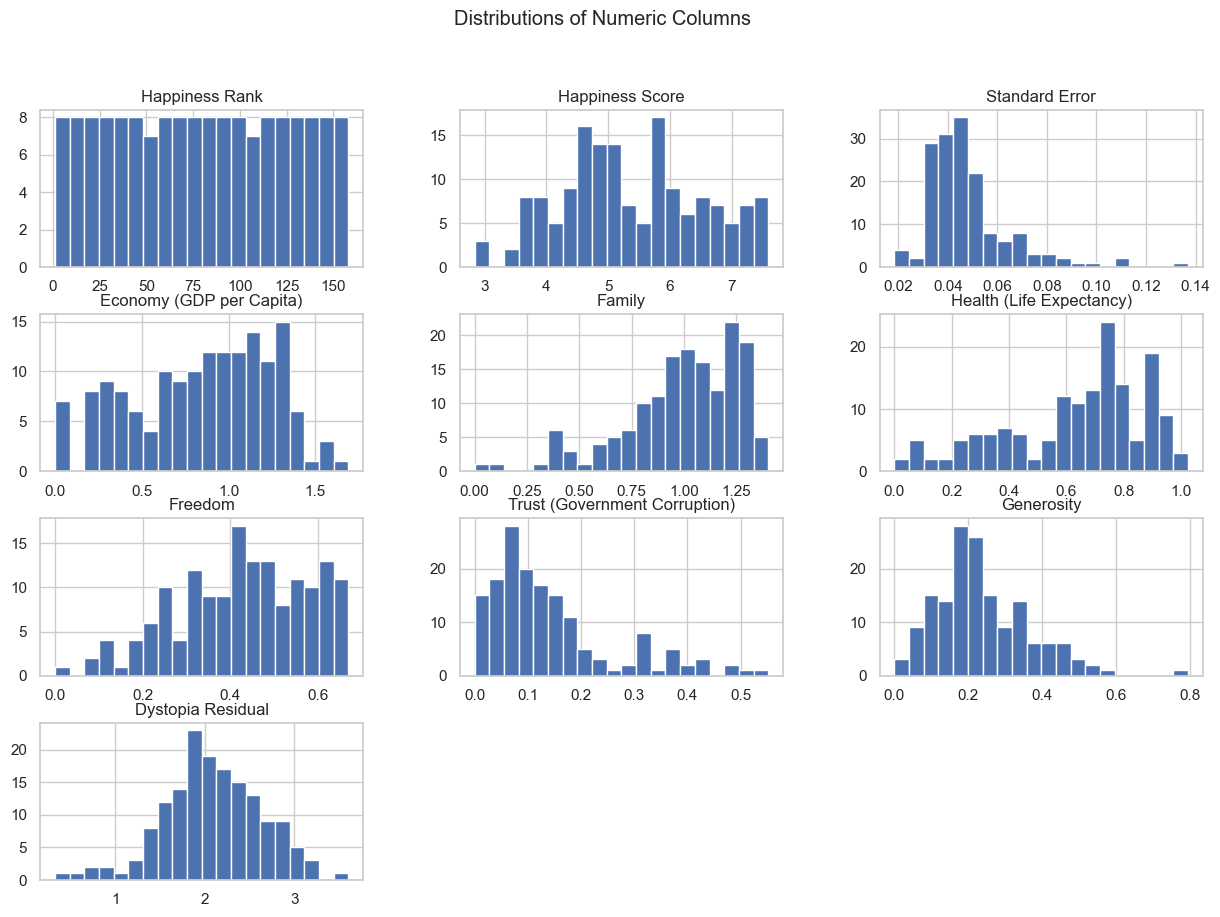

In [7]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle("Distributions of Numeric Columns")
plt.show()


### 🚨 Outlier Analysis using Boxplots
Boxplots help identify extreme values in the data.


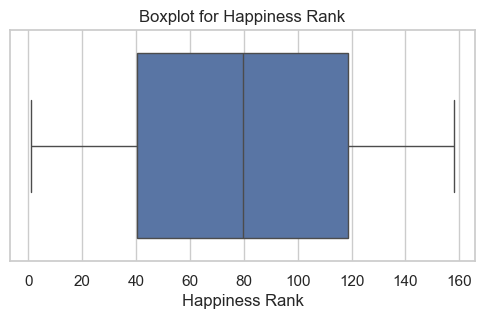

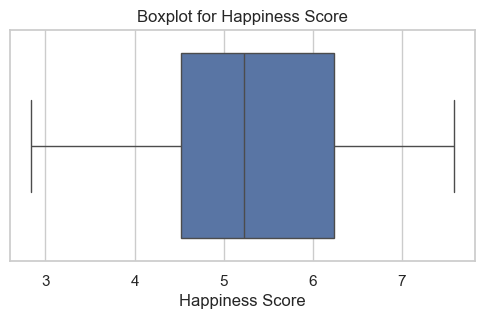

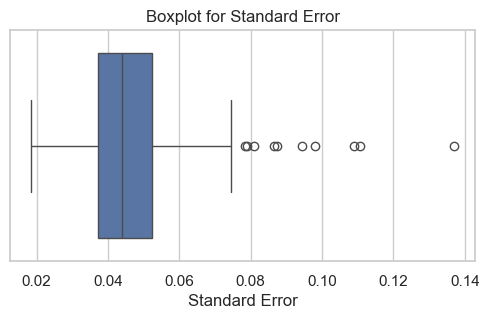

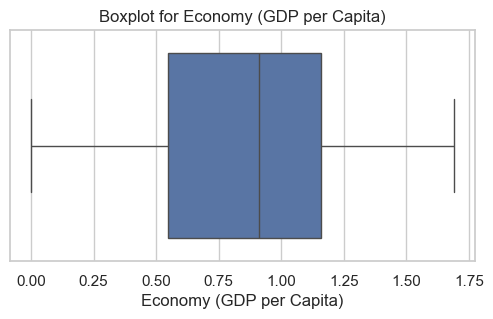

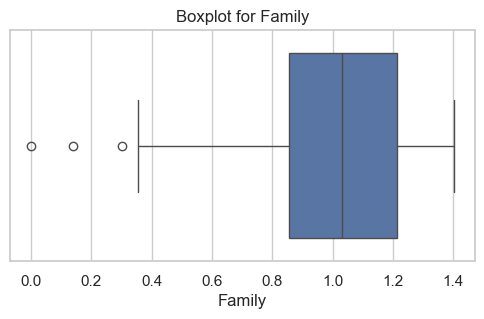

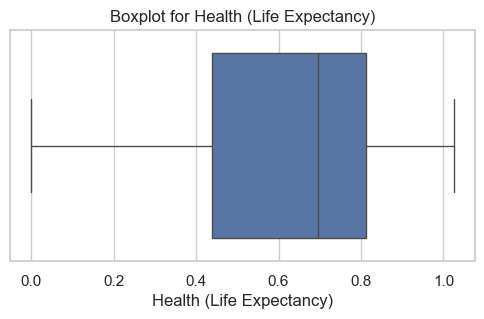

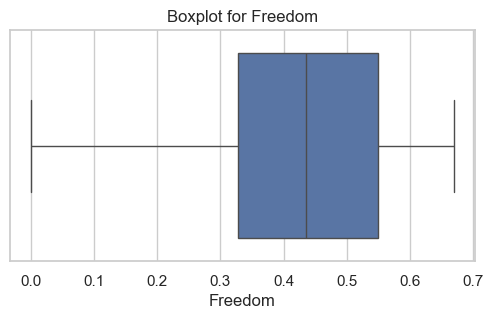

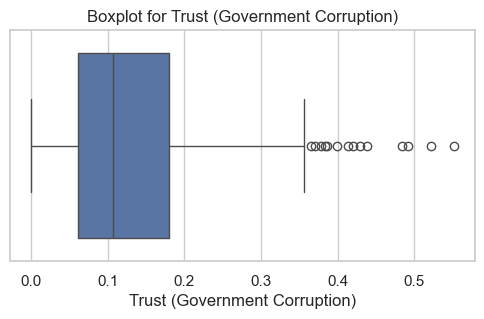

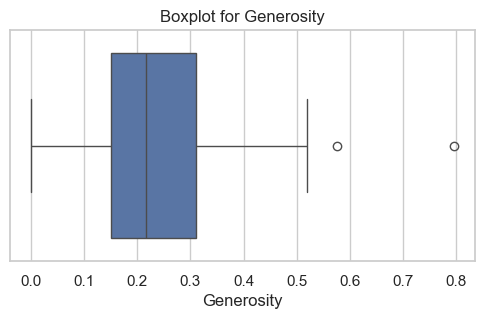

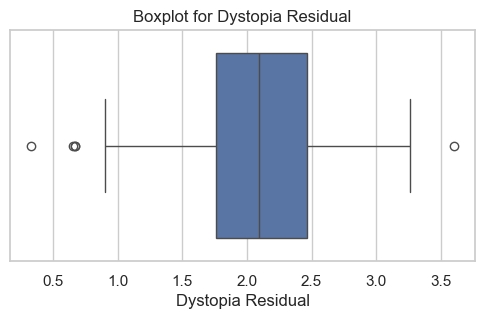

In [9]:
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


### 🔗 Correlation Matrix
We assess how strongly the independent variables relate to happiness (Life Ladder).


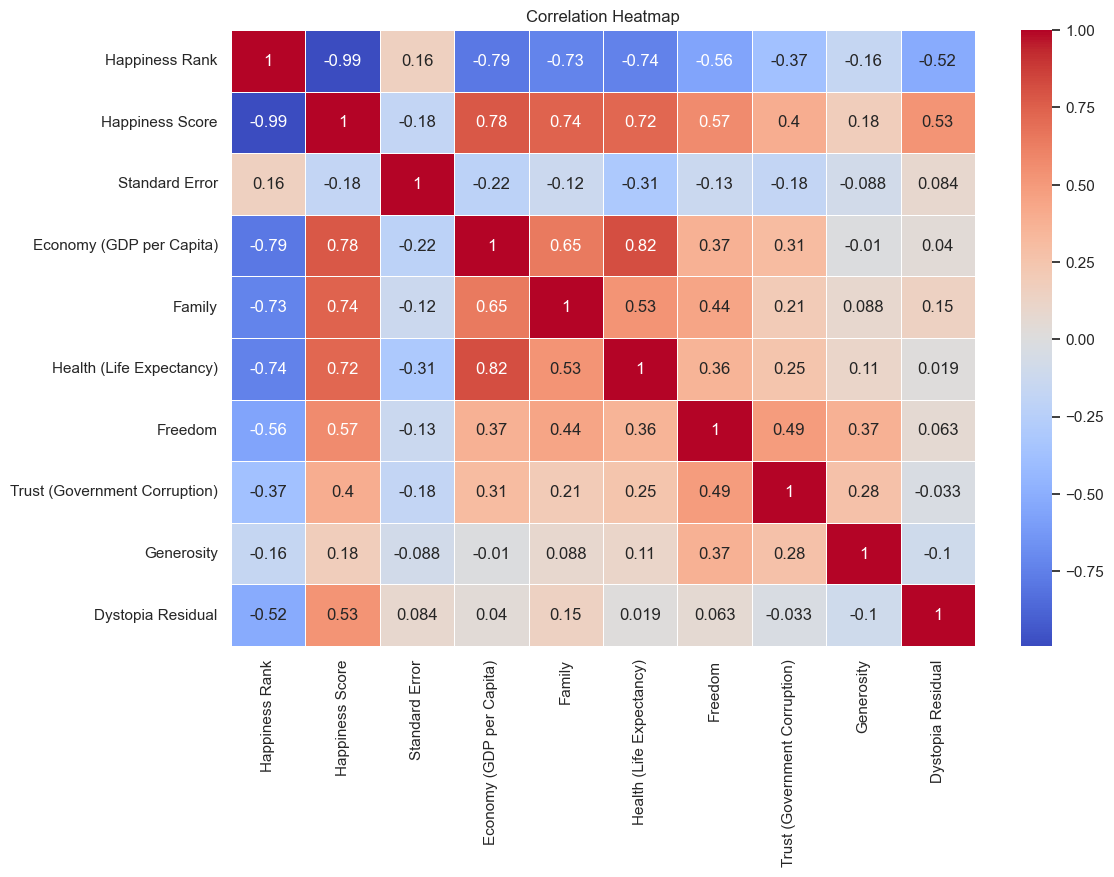

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### 🔍 Pairwise Relationships
We visualize relationships between variables using pair plots.


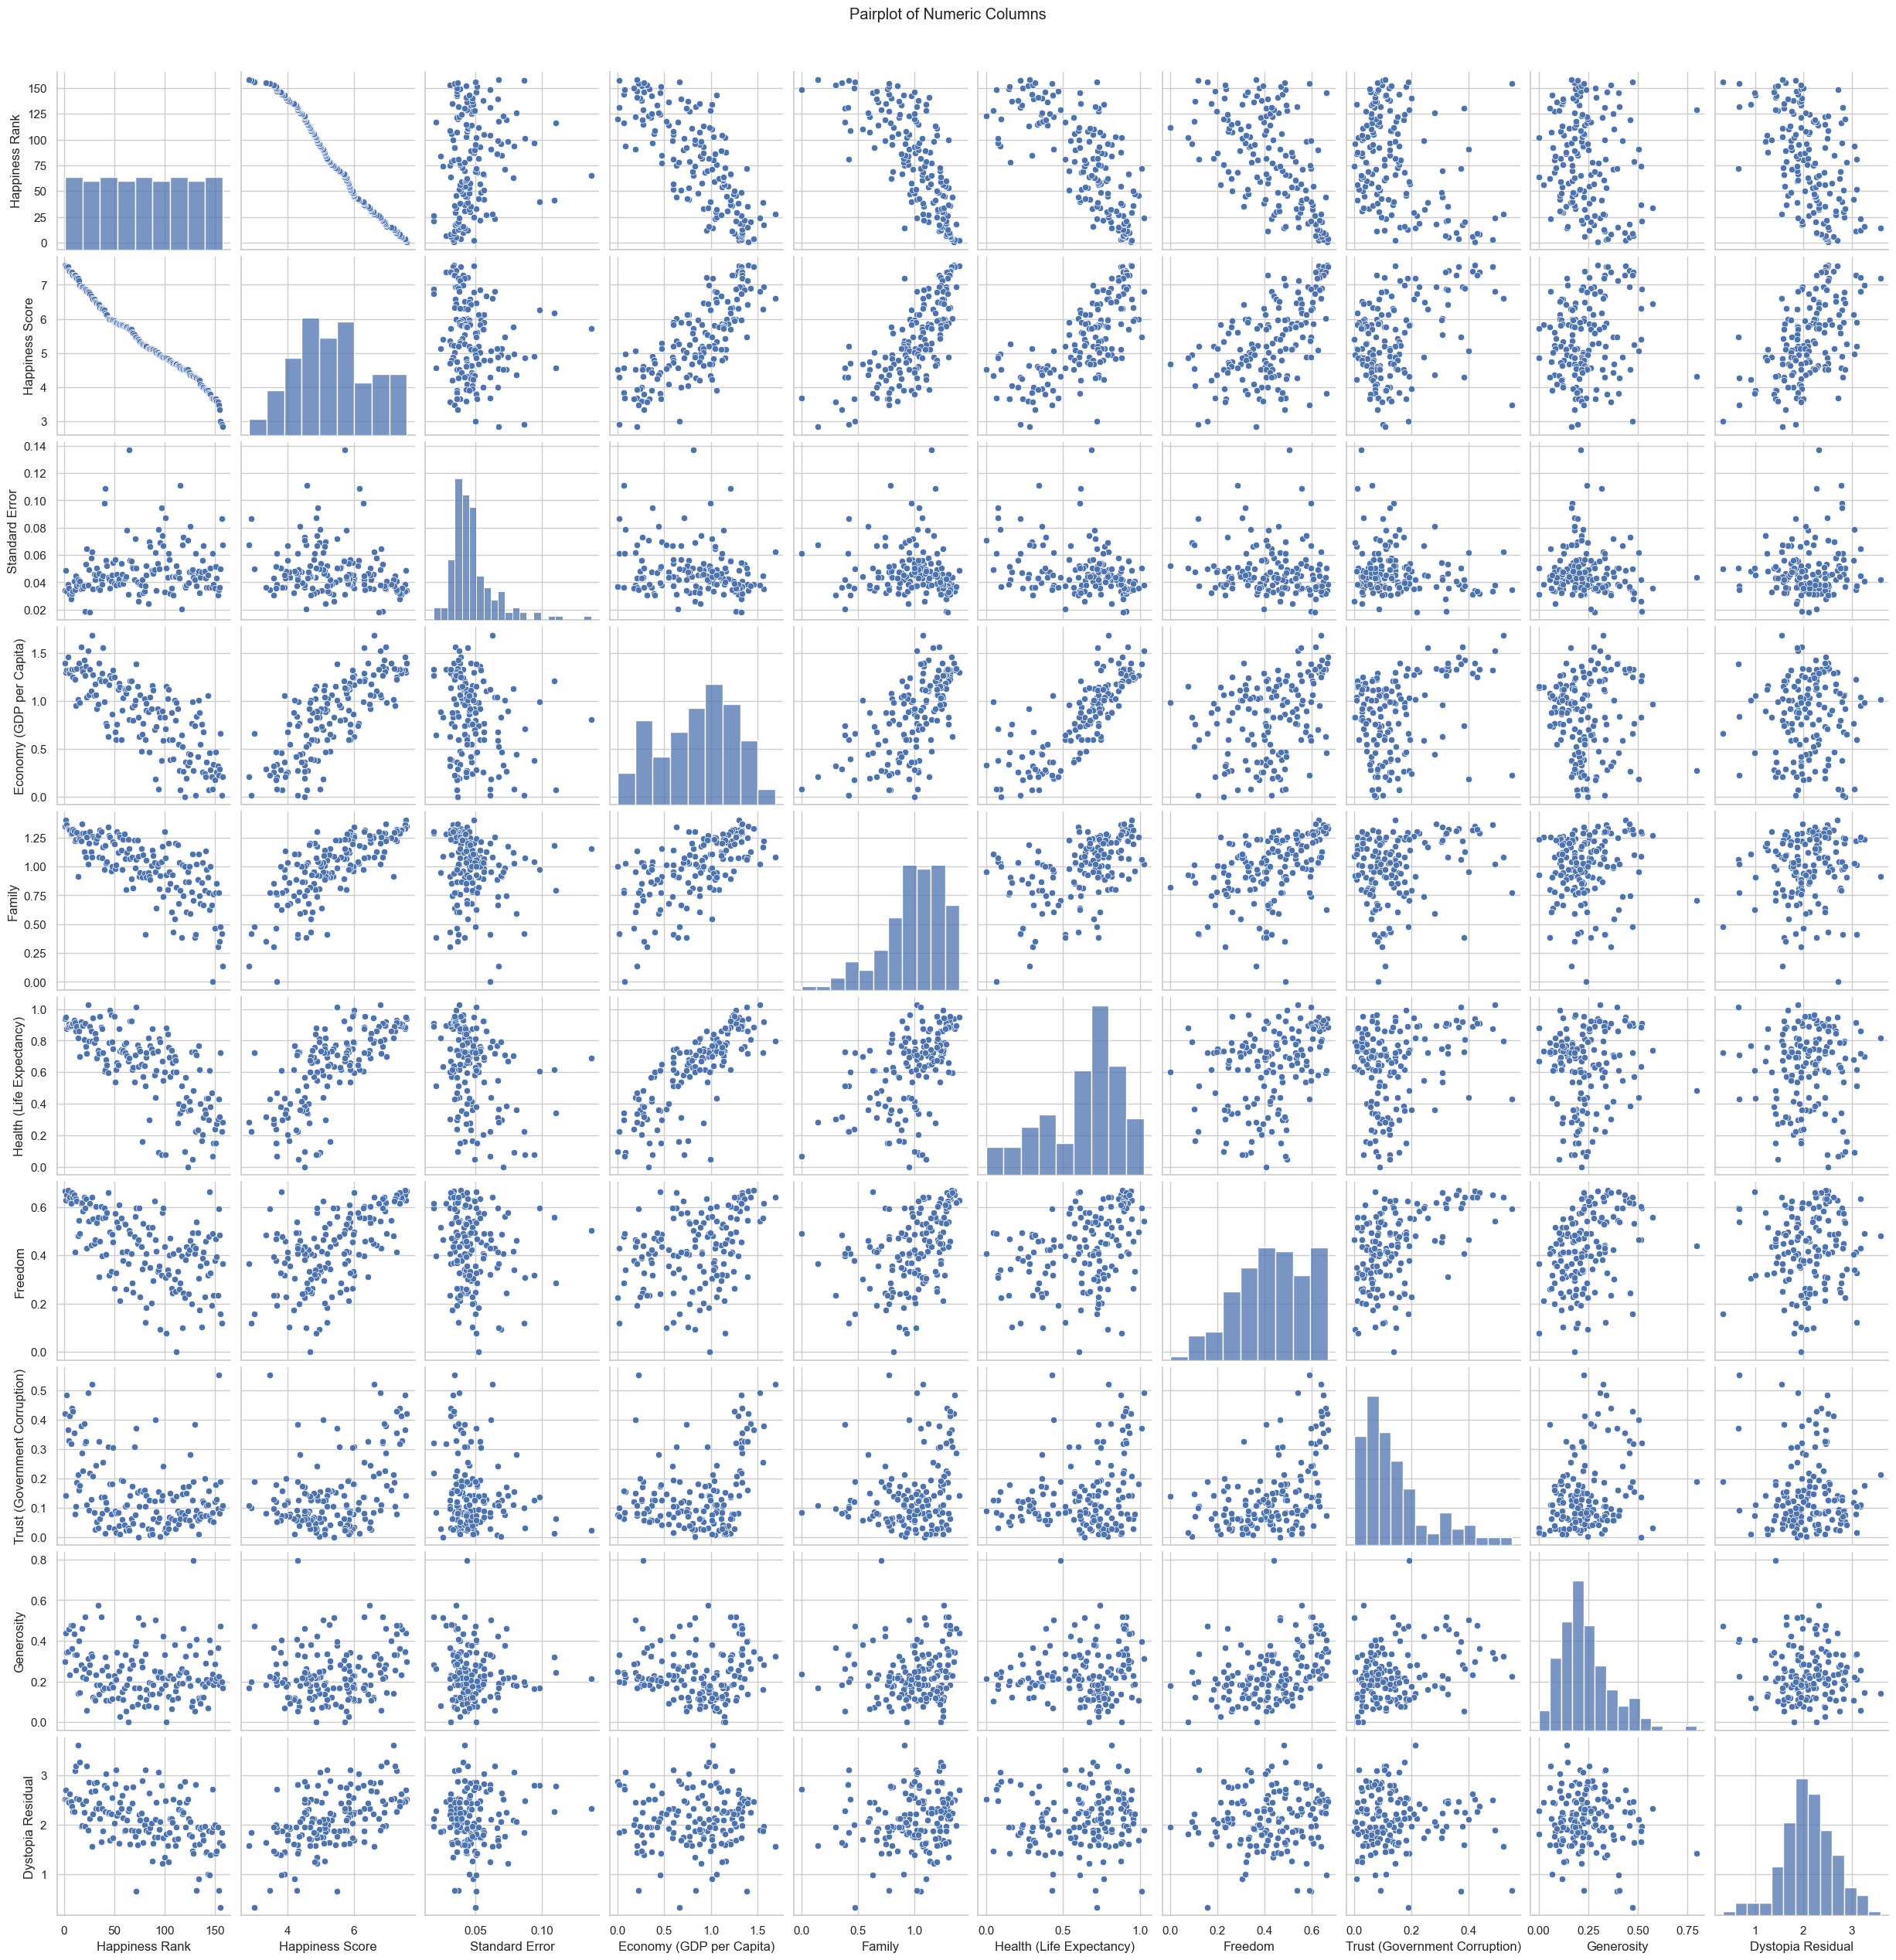

In [11]:
sns.pairplot(df[numeric_cols])
plt.suptitle("Pairplot of Numeric Columns", y=1.02)
plt.show()


## 🧹 Data Preparation for Modeling
We select features, drop missing values, and split the data.


In [15]:
print(df.columns.tolist())


['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


In [16]:
# ✅ Use column names exactly as they appear in your dataset
features = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
            'Freedom', 'Trust (Government Corruption)', 'Generosity']
target = 'Happiness Score'

# ✅ Drop missing values
model_df = df[[target] + features].dropna()
X = model_df[features]
y = model_df[target]


## 📏 Single-Variable Linear Regression (Optional Analysis)

Before applying multivariable models, we test a simple linear regression using only **Economy (GDP per Capita)** as the predictor.

This helps us understand how much of the variation in happiness scores can be explained by GDP alone.

We will compare this single-variable model to the multivariable models later using R², RMSE, and MAE.


In [25]:
# Single-variable model with just GDP
X_single = model_df[['Economy (GDP per Capita)']]
y_single = model_df['Happiness Score']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_single, y_single, test_size=0.2, random_state=42)

lr_single = LinearRegression()
lr_single.fit(X_train_s, y_train_s)
y_pred_single = lr_single.predict(X_test_s)

print("Single-Variable Linear Regression (GDP only):")
evaluate(y_test_s, y_pred_single, "Linear Regression - Single Variable")


Single-Variable Linear Regression (GDP only):
🔎 Linear Regression - Single Variable
RMSE: 0.7127519471132034
MAE : 0.588015188007053
R²  : 0.6419276843111854



## 📉 Linear Regression
We train a simple linear regression model using all six features to predict the Happiness Score.


In [18]:
from sklearn.model_selection import train_test_split

# Your updated feature names based on your dataset
features = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
            'Freedom', 'Trust (Government Corruption)', 'Generosity']
target = 'Happiness Score'

# Drop missing values
model_df = df[[target] + features].dropna()

# Define X and y
X = model_df[features]
y = model_df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression R² Score:", r2_score(y_test, y_pred_lr))


Linear Regression R² Score: 0.8294705100069293


## 🧮 Polynomial Regression (Degree = 2)
This model includes squared and interaction terms to capture non-linear relationships.


In [20]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_lr = LinearRegression()
poly_lr.fit(X_poly_train, y_train)
y_pred_poly = poly_lr.predict(X_poly_test)

print("Polynomial Regression R² Score:", r2_score(y_test, y_pred_poly))


Polynomial Regression R² Score: 0.7268351490289918


## ⛰️ Ridge Regression
We apply L2 regularization to prevent overfitting and manage multicollinearity.


In [21]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Ridge Regression R² Score:", r2_score(y_test, y_pred_ridge))


Ridge Regression R² Score: 0.8230413177270269


## 📊 Compare Model Metrics: RMSE, MAE, and R²
This helps us evaluate which model performs best on the test data.


In [22]:
def evaluate(y_true, y_pred, model_name):
    print(f"🔎 {model_name}")
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("R²  :", r2_score(y_true, y_pred))
    print()

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_poly, "Polynomial Regression")
evaluate(y_test, y_pred_ridge, "Ridge Regression")


🔎 Linear Regression
RMSE: 0.4918727765750382
MAE : 0.4023049853814399
R²  : 0.8294705100069293

🔎 Polynomial Regression
RMSE: 0.6225374009495249
MAE : 0.5085412081724927
R²  : 0.7268351490289918

🔎 Ridge Regression
RMSE: 0.5010591274451389
MAE : 0.42178603705811035
R²  : 0.8230413177270269



## 🔧 Ridge Regression: Hyperparameter Tuning
We perform GridSearchCV to find the best alpha value that improves model generalization.


In [23]:
alphas = np.linspace(0.001, 10, 100)
param_grid = {'alpha': alphas}

grid = GridSearchCV(Ridge(), param_grid=param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

# Best model and predictions
best_ridge = grid.best_estimator_
y_pred_best = best_ridge.predict(X_test)

print("✅ Best Alpha:", grid.best_params_['alpha'])
evaluate(y_test, y_pred_best, "Ridge Regression (Tuned)")


✅ Best Alpha: 1.617
🔎 Ridge Regression (Tuned)
RMSE: 0.5083221162616819
MAE : 0.4340167640203043
R²  : 0.8178740076174723



## ✅ Conclusion

- The most influential predictors of happiness are **Economy (GDP per Capita)** and **Family (Social Support)**.
- Polynomial Regression captured more complex relationships, improving R² compared to Linear Regression.
- Ridge Regression with tuned alpha achieved a strong balance between model complexity and performance.
- This project demonstrates how data science can extract real insights from socio-economic data to inform policy and well-being initiatives.
